# <center> <div class="alert-block alert-info alert"> <span style="color:green;"> Nigeria Temperature Change Forecasting Using Machine Learning </center>

**Project Overview**

The rapid growing world population is threatened by increase in land surface air temperature associated with rising greenhouse gas concentrations.
The project seeks to perform a time series forecasting for Nigeria's Environment temperature change over a time period of 60 years (1961 - 2021) using SARIMA model based on FAOSTAT Temperature Change statistics. The forecast will help to identify  risk  and  design  the  responses  necessary  to  safeguard  the  agriculture,  forestry  and  fisheries sectors in the future.


The aims and objective of the project include:

1. To preprocess data sourced from FAO website. 
2. To build a SARIMA forecast for the next 24 months by going back 24 months in time.
3. To check if the time series is stationary.
4. To check the order of the best model.
5. To check the AIC of the best model.



**Project plan**
1. Data Collection
2. Data Preprocessing
    - Filtering of data by:
    - Location - Nigeria
    - Periodicity - January to December
    - Element - Temperature change
    - Formatting data into time series format and saving to .csv file
3. Exploratory Data Analysis
4. Modeling
5. Results evaluation



**About the model**

ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values i.e. it is a univariate time series forecasting model. This algorithm does not support time series with seasonal pattern. The SARIMA model is an extension to ARIMA that supports direct modeling of seasonal component.
The Seasonal Autoregressive Integrated Moving Average, or SARIMA, method will be performed on Nigeria's Environment temperature change time series data for forecasting.

## Dataset

The dataset contains FAOSTAT Climate Change – Environment Temperature statistics of mean surface 
temperature change of 197 countries and 41 territories for the period 1961–2021. Statistics available include monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature 
change of the baseline methodology is also available. Data are based on the publicly 
available GISTEMP data, the Global Surface Temperature Change data distributed by the 
National Aeronautics and Space Administration Goddard Institute for Space Studies(NASA-GISS)

Data: 

FAO, 2022. FAOSTAT Climate Change, Temperature Change, available at: 
http://www.fao.org/faostat/en/#data/ET . FAO, Rome Italy.

The data I used for this analysis can be accessed here: `"data/env_temp_change.csv"`





| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Area Code        | Numeric, unique encoded values for area.                                                                                        |
| Area             | Character, the name of countries and regions     |
| Months Code      | Numeric, unique encoded values for months.                                                                                         |
| Months           | Character, duration in which temperature was computed.                                                                                                 |
| Element Code     | Numeric, element code contains '7271', '6078'.                                                                                        |
| Element          | Character, value for element one of  “Temperature change” and “Standard Deviation”.                                                                                         |
| Unit             | Character, °C.                                                                                         |
| Y1961 - Y2021   | Numeric, value for mean temperature.                                                                                         |

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import os.path
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [2]:
# load csv file
df = pd.read_csv("data/env_temp_change.csv", encoding='ISO-8859-1')

In [3]:
# peek into the dataset by printing out the first five rows
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.786,0.039,2.718,...,-0.425,1.368,1.761,1.937,3.612,1.273,2.127,2.978,-0.584,0.558
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.944,1.944,1.944,...,1.944,1.944,1.944,1.944,1.944,1.944,1.944,1.944,1.944,1.944
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.762,2.423,3.880,...,-3.066,1.615,-3.110,2.592,2.454,-0.189,2.760,0.112,2.548,4.149
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.603,2.603,2.603,...,2.603,2.603,2.603,2.603,2.603,2.603,2.603,2.603,2.603,2.603
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.477,1.293,0.391,...,-0.366,2.369,-0.061,-0.545,2.459,0.923,4.580,0.354,0.611,2.557


# <center> <div class="alert-block alert-info alert"> <span style="color:green;"> Data Preprocessing </center>

In [4]:
# check the data properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8291 non-null   float64
 8   Y1962         8320 non-null   float64
 9   Y1963         8292 non-null   float64
 10  Y1964         8250 non-null   float64
 11  Y1965         8253 non-null   float64
 12  Y1966         8357 non-null   float64
 13  Y1967         8312 non-null   float64
 14  Y1968         8284 non-null   float64
 15  Y1969         8276 non-null   float64
 16  Y1970         8264 non-null   float64
 17  Y1971         8340 non-null   float64
 18  Y1972         8381 non-null 

In [5]:
# check the shape of the dataset i.e. the number of rows and columns
df.shape

(9656, 68)

In [6]:
# Check the datatypes
df.dtypes

Area Code         int64
Area             object
Months Code       int64
Months           object
Element Code      int64
                 ...   
Y2017           float64
Y2018           float64
Y2019           float64
Y2020           float64
Y2021           float64
Length: 68, dtype: object

In [7]:
# check the data columns
df.columns

Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021'],
      dtype='object')

In [8]:
df.nunique()

Area Code        284
Area             284
Months Code       17
Months            17
Element Code       2
                ... 
Y2017           2581
Y2018           2713
Y2019           2667
Y2020           2745
Y2021           2658
Length: 68, dtype: int64

In [9]:
# Filter columns based on project scope - 
# 1. Area == Nigeria 
# 2. Element == Temperature change 
# 3. Months == 12 calendar months

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df = df.loc[(df['Area'] == 'Nigeria') &         
             (df["Element"] == 'Temperature change') &
             (df['Months'].isin(months))]

In [10]:
# Drop colums - Area Code, Area, Months Code, Element, Element Code and Unit

cols_to_drop = ['Area Code', 'Area', 'Months Code', 'Element', 'Element Code', 'Unit']
df = df.drop(columns = cols_to_drop)

In [11]:
# Print out columns containing null values
df.isnull().sum()

Months    0
Y1961     0
Y1962     0
Y1963     0
Y1964     0
         ..
Y2017     0
Y2018     0
Y2019     0
Y2020     0
Y2021     0
Length: 62, dtype: int64

In [12]:
#  print the project scope dataset
df

,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
5372,January,0.477,-1.310,0.482,-0.054,0.909,0.271,-1.341,-0.574,-0.593,...,0.162,1.205,1.064,-0.139,0.509,1.842,-0.260,1.177,0.429,2.760
5374,February,-2.256,-0.312,1.565,-0.577,0.253,-0.898,0.160,-0.179,1.066,...,1.831,1.526,0.877,1.869,0.650,0.313,2.209,0.344,0.084,0.209
5376,March,-0.904,0.060,-0.748,0.414,-0.666,-0.044,-0.567,-0.237,1.213,...,0.553,2.064,1.160,1.326,2.623,1.144,1.283,2.057,1.358,1.311
5378,April,0.045,-0.301,-0.295,0.003,-0.488,-0.301,0.223,-0.839,0.556,...,1.677,0.628,1.200,0.302,1.914,1.418,1.224,1.887,1.929,1.052
5380,May,0.532,-0.121,0.190,-0.082,0.075,-0.298,0.394,-0.651,0.679,...,0.353,0.874,0.559,1.707,1.323,1.239,1.365,1.632,1.636,1.316
5382,June,-0.010,-0.432,0.478,-0.237,-0.323,-0.090,0.046,-0.665,0.348,...,0.165,1.113,1.539,2.161,0.777,0.935,0.922,1.253,1.495,1.666
5384,July,-0.487,0.274,0.461,-0.518,0.080,0.927,-0.345,-0.082,0.089,...,0.131,1.413,1.576,1.714,1.047,0.953,0.777,1.151,0.999,1.170
5386,August,-0.458,-0.324,0.266,-0.553,-0.240,0.277,-0.428,0.764,0.104,...,0.130,-0.022,0.387,1.286,1.035,0.757,0.773,0.875,0.800,0.924
5388,September,-0.227,-0.201,0.559,-0.585,0.073,-0.174,-0.390,0.371,0.194,...,0.145,0.396,0.574,0.732,1.355,1.125,0.697,1.252,0.515,1.157
5390,October,-0.478,0.011,0.120,-0.738,0.068,0.019,-0.615,0.257,0.091,...,0.953,0.677,1.152,1.581,1.648,1.485,1.036,0.324,0.931,1.602


In [13]:
# Descriptive Statistics
df.describe()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,-0.474250,-0.071917,0.256833,-0.266500,-0.142417,-0.013583,-0.222000,-0.052833,0.369583,0.092833,...,0.691917,1.033750,1.043583,1.072500,1.424417,1.165250,1.014250,1.266667,1.174917,1.400250
std,0.772425,0.596487,0.597062,0.401852,0.483916,0.436440,0.605504,0.582718,0.535051,0.423400,...,0.651660,0.558367,0.378777,0.895769,0.676488,0.397303,0.604101,0.637587,0.676567,0.655462
min,-2.256000,-1.310000,-0.748000,-0.738000,-0.803000,-0.898000,-1.341000,-0.839000,-0.593000,-0.488000,...,0.130000,-0.022000,0.387000,-0.835000,0.509000,0.313000,-0.260000,0.324000,0.084000,0.209000
25%,-0.676000,-0.315000,0.016250,-0.579000,-0.527750,-0.205000,-0.579000,-0.593250,0.090500,-0.180250,...,0.157750,0.664750,0.801250,0.624500,0.970500,0.948500,0.754000,0.872000,0.728750,1.130750
50%,-0.468000,-0.161000,0.363500,-0.377500,-0.086000,-0.064500,-0.367500,-0.130500,0.271000,-0.020500,...,0.453000,1.159000,1.129500,1.306000,1.339000,1.191500,0.979000,1.214500,1.178500,1.309000
75%,0.003750,0.113500,0.488250,-0.039750,0.076250,0.242500,0.175750,0.285500,0.736250,0.379500,...,1.098750,1.309500,1.232000,1.708750,1.813500,1.432500,1.303500,1.695750,1.530250,1.618000
max,0.532000,1.036000,1.565000,0.414000,0.909000,0.927000,0.942000,0.965000,1.213000,0.868000,...,1.831000,2.064000,1.576000,2.161000,2.623000,1.842000,2.209000,2.385000,2.445000,2.760000


For modeling purpose, the dataset has to be converted to time series.

In [14]:
# Transpose the dataframe
df = df.T
df

,5372,5374,5376,5378,5380,5382,5384,5386,5388,5390,5392,5394
Months,January,February,March,April,May,June,July,August,September,October,November,December
Y1961,0.477,-2.256,-0.904,0.045,0.532,-0.01,-0.487,-0.458,-0.227,-0.478,-0.6,-1.325
Y1962,-1.31,-0.312,0.06,-0.301,-0.121,-0.432,0.274,-0.324,-0.201,0.011,1.036,0.757
Y1963,0.482,1.565,-0.748,-0.295,0.19,0.478,0.461,0.266,0.559,0.12,-0.503,0.507
Y1964,-0.054,-0.577,0.414,0.003,-0.082,-0.237,-0.518,-0.553,-0.585,-0.738,-0.665,0.394
...,...,...,...,...,...,...,...,...,...,...,...,...
Y2017,1.842,0.313,1.144,1.418,1.239,0.935,0.953,0.757,1.125,1.485,1.296,1.476
Y2018,-0.26,2.209,1.283,1.224,1.365,0.922,0.777,0.773,0.697,1.036,1.569,0.576
Y2019,1.177,0.344,2.057,1.887,1.632,1.253,1.151,0.875,1.252,0.324,2.385,0.863
Y2020,0.429,0.084,1.358,1.929,1.636,1.495,0.999,0.8,0.515,0.931,1.478,2.445


In [15]:
df.columns=df.iloc[0] # Rename the columns of the dataset

df.drop(['Months'], inplace = True) # Delete row the first row in the dataset
df

Months,January,February,March,April,May,June,July,August,September,October,November,December
Y1961,0.477,-2.256,-0.904,0.045,0.532,-0.01,-0.487,-0.458,-0.227,-0.478,-0.6,-1.325
Y1962,-1.31,-0.312,0.06,-0.301,-0.121,-0.432,0.274,-0.324,-0.201,0.011,1.036,0.757
Y1963,0.482,1.565,-0.748,-0.295,0.19,0.478,0.461,0.266,0.559,0.12,-0.503,0.507
Y1964,-0.054,-0.577,0.414,0.003,-0.082,-0.237,-0.518,-0.553,-0.585,-0.738,-0.665,0.394
Y1965,0.909,0.253,-0.666,-0.488,0.075,-0.323,0.08,-0.24,0.073,0.068,-0.647,-0.803
...,...,...,...,...,...,...,...,...,...,...,...,...
Y2017,1.842,0.313,1.144,1.418,1.239,0.935,0.953,0.757,1.125,1.485,1.296,1.476
Y2018,-0.26,2.209,1.283,1.224,1.365,0.922,0.777,0.773,0.697,1.036,1.569,0.576
Y2019,1.177,0.344,2.057,1.887,1.632,1.253,1.151,0.875,1.252,0.324,2.385,0.863
Y2020,0.429,0.084,1.358,1.929,1.636,1.495,0.999,0.8,0.515,0.931,1.478,2.445


In [16]:
# Numpy will be used to transform the data into a 1-D array
df = df.to_numpy()                            # convert to numpy
temperature = list(np.concatenate(df).flat)    # concatenate array lists of lists and flatten

In [17]:
#  create a date range from January 1961 to December 2021, setting frequency as 'Month'
dates = pd.date_range(start='01/1961', end='01/2022', freq='M')

In [18]:
#  concatenate the date and tempemperature into a dataframe
df_monthly = pd.DataFrame({'date': dates, 'temp': temperature})

# set date as dataframe index
df_monthly.set_index('date', inplace= True)

df_monthly

,temp
date,
1961-01-31,0.477
1961-02-28,-2.256
1961-03-31,-0.904
1961-04-30,0.045
1961-05-31,0.532
...,...
2021-08-31,0.924
2021-09-30,1.157
2021-10-31,1.602


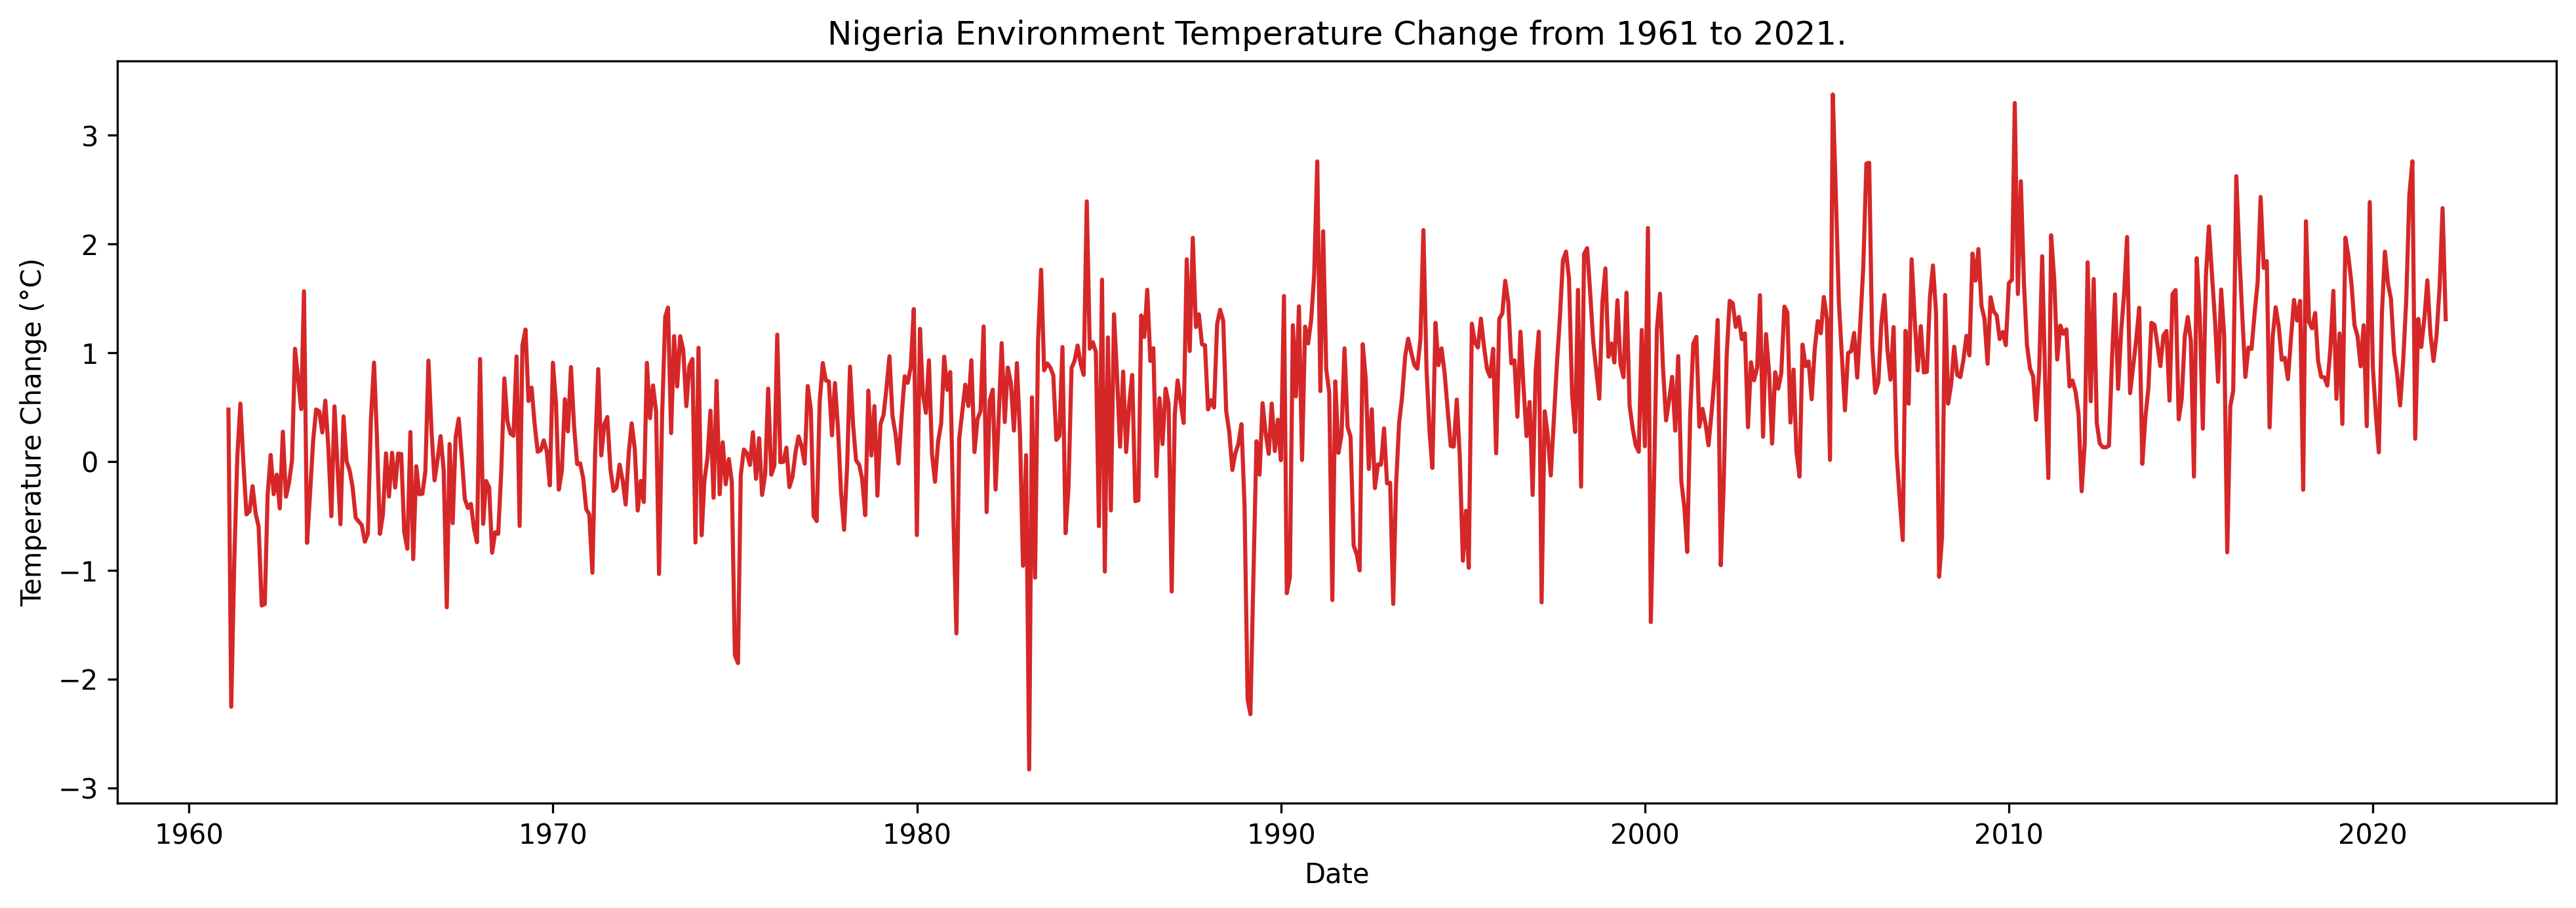

In [19]:
# resulting plot of the processed time series data
def plot_df(df_monthly, x, y, title="", xlabel='Date', ylabel='Temperature Change (°C)', dpi=300):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_monthly, x=df_monthly.index, y=df_monthly.temp, title='Nigeria Environment Temperature Change from 1961 to 2021.')    

In [ ]:
# let's save our processed time series data
df_monthly.to_csv(os.path.join('data','NigeriaETchangeDataset.csv'))

## Data Validation

- #### Observations:
1. The dataset consists of 9656 rows and 68 columns.
2. The dataset consists of 284 unique countries.
3. The dataset consists of enviroment temperature for the period 1961 to 2021.
4. The dataset 'Area' column has a distinct numeric value in the 'Area Code' column.
5. The dataset 'Months' column has a distinct numeric value in the 'Months Code' column.
6. The 'Unit' column has a single value - °C.
7. The 'Element' column has 2 unique variables: Temperature change and Standard Deviation.


- #### Data Cleaning:
1. Filtering of columns based on project scope:
    * The Area column was fltered using 'Nigeria'.
    * 'Temperature Change' was used to filter the Element column.
    * The Months column was filtered based on calendar months: January, February, March, April, May, June, July, August, September, November and December.
2. The columns - Area Code, Area, Months Code, Element, Element Code and Unit were dropped to avoid singularity error.
3. There were no missing values in the filtered dataset.
4. The data was processed to a time series data and saved as a .csv file.

# <center> <div class="alert-block alert-info alert"> <span style="color:green;"> Modeling - Time Series Forecasting </center>

In [20]:
# Visualizing a time series data
import matplotlib.pyplot as plt
import seaborn as sns

import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss # ADF Test and KPSS Test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot #Autocorrelation plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.nonparametric.smoothers_lowess import lowess # smoothen a time series

In [25]:
# load data
model_data = pd.read_csv('data/NigeriaETchangeDataset.csv', parse_dates=['date'], index_col='date')
model_data.head()

,temp
date,
1961-01-31,0.477
1961-02-28,-2.256
1961-03-31,-0.904
1961-04-30,0.045
1961-05-31,0.532


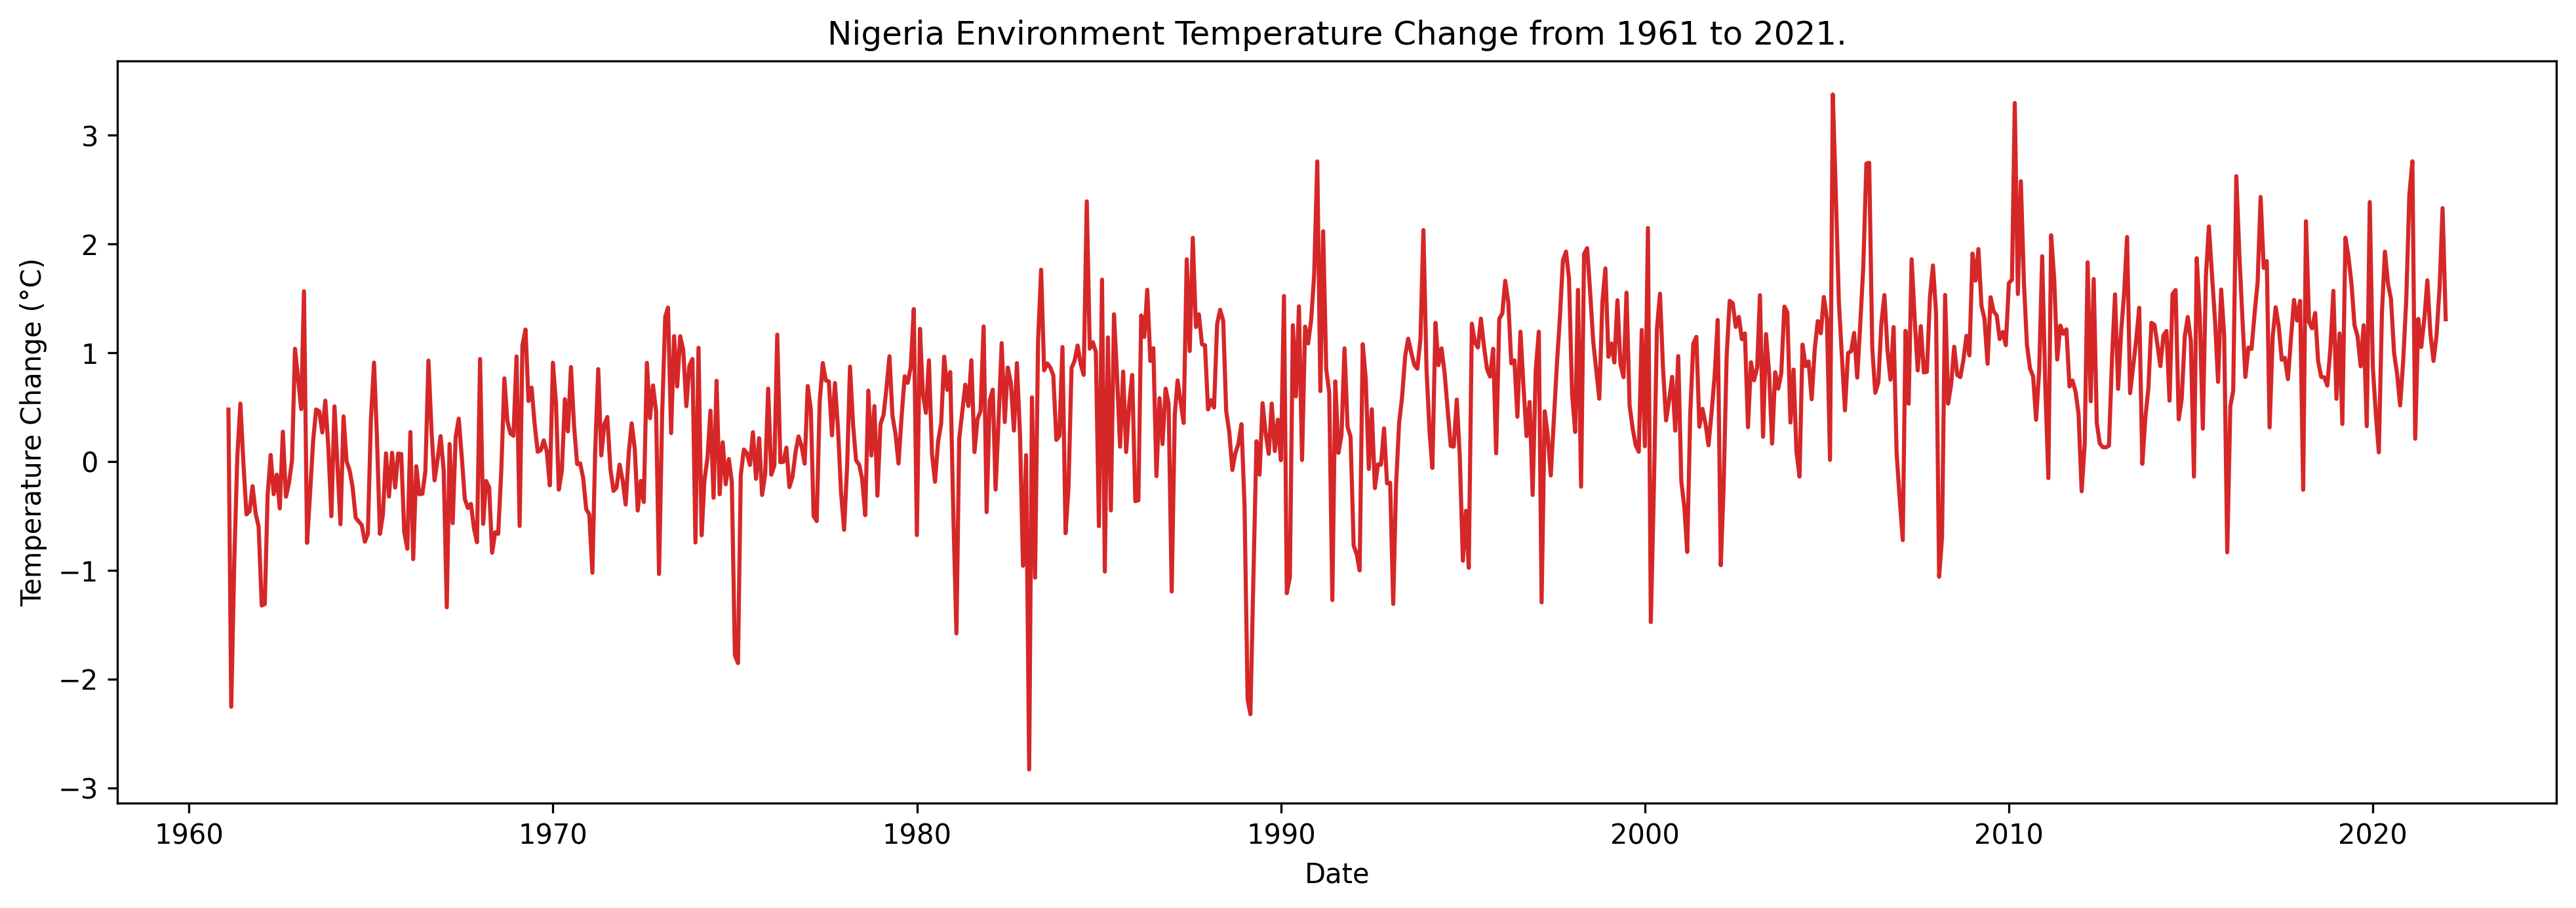

In [26]:
# plot of the data
def plot_df(model_data, x, y, title="", xlabel='Date', ylabel='Temperature Change (°C)', dpi=300):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(model_data, x=model_data.index, y=model_data.temp, title='Nigeria Environment Temperature Change from 1961 to 2021.')   

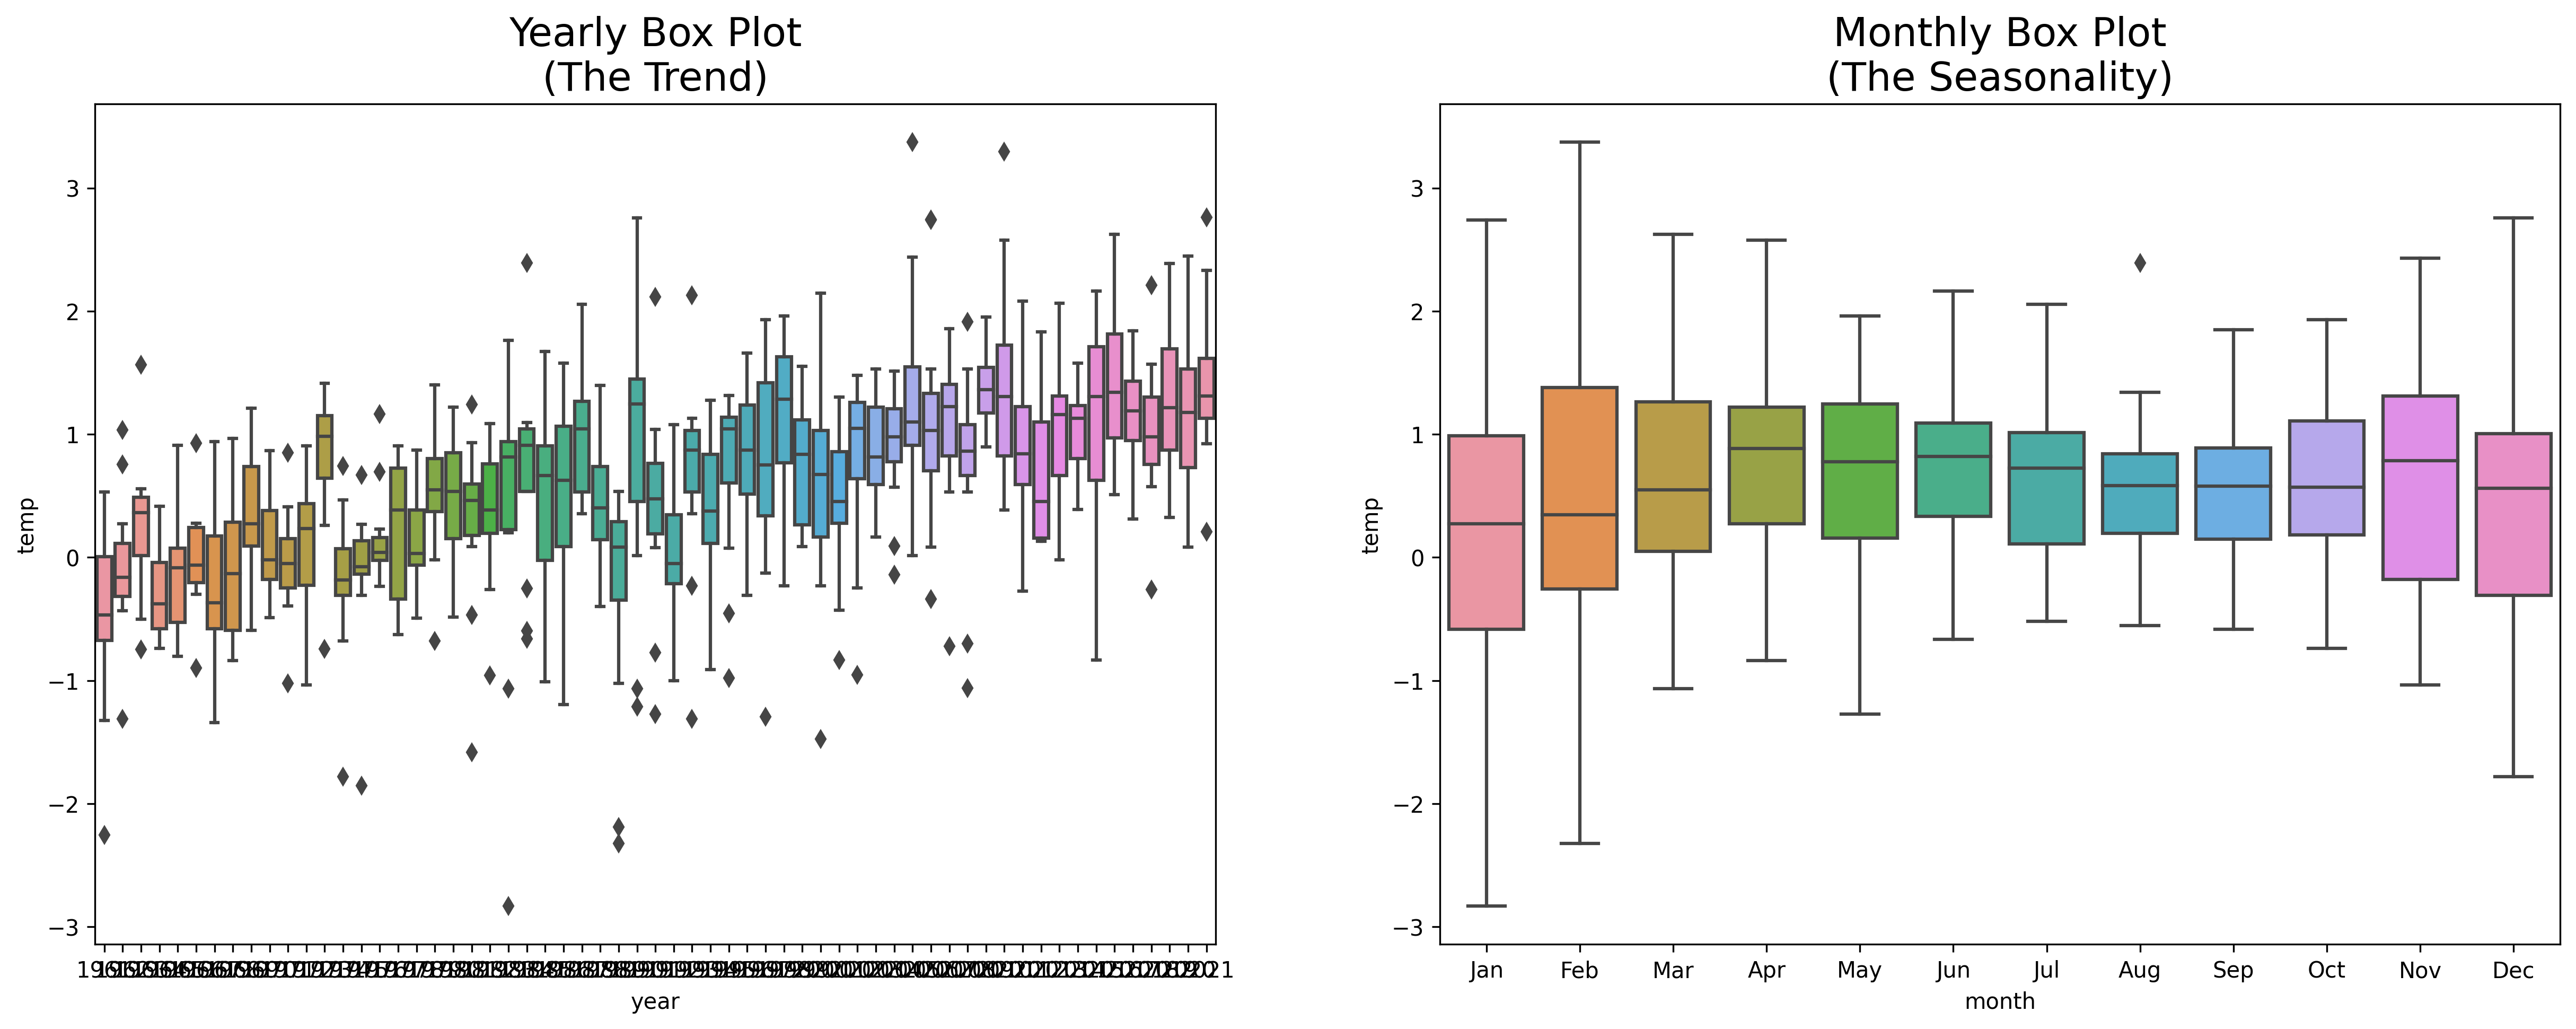

In [27]:
# Prepare data
model_data['year'] = [d.year for d in model_data.index]
model_data['month'] = [d.strftime('%b') for d in model_data.index]
years = model_data['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 300)
sns.boxplot(x='year', y='temp', data=model_data, ax=axes[0])
sns.boxplot(x='month', y='temp', data=model_data.loc[~model_data.year.isin([1961, 2021]), :])

# Set Title
axes[0].set_title('Yearly Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Monthly Box Plot\n(The Seasonality)', fontsize=18)
# plt.xticks(rotation=90)

plt.show()

In [28]:
# Test for data stationarity

# Applying the Augmented Dickey Fuller test (ADF Test)
result = adfuller(model_data.temp, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.9087909390147018
p-value: 0.0019710947816629853
Critial Values:
   1%, -3.439477677285233
Critial Values:
   5%, -2.865568186630048
Critial Values:
   10%, -2.5689150720653977


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

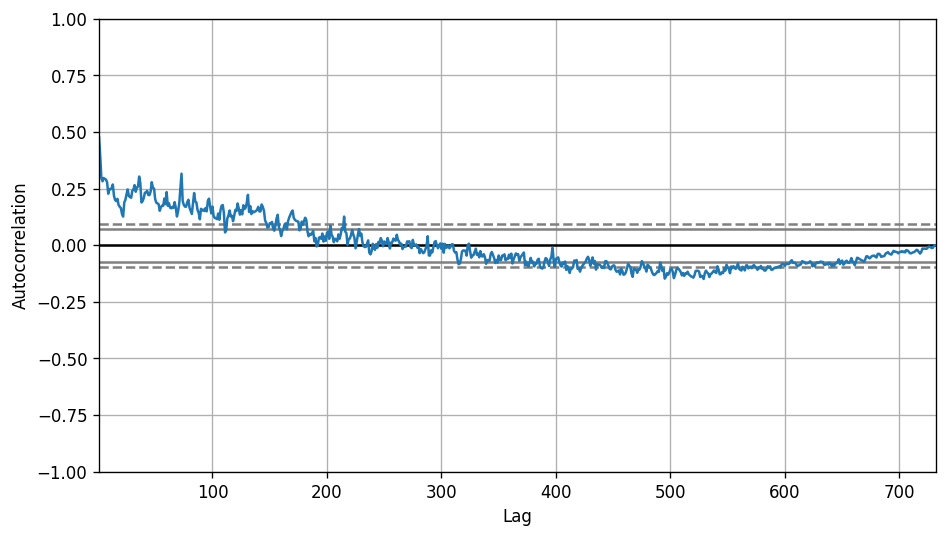

In [29]:
#Autocorrelation Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(model_data.temp.tolist())

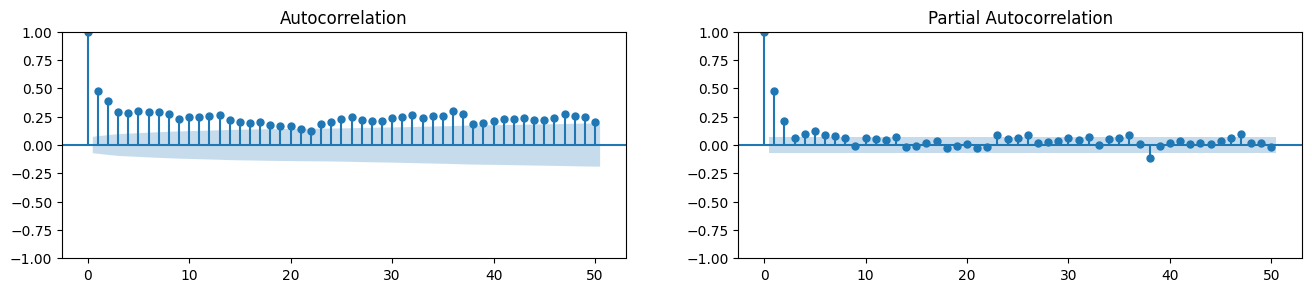

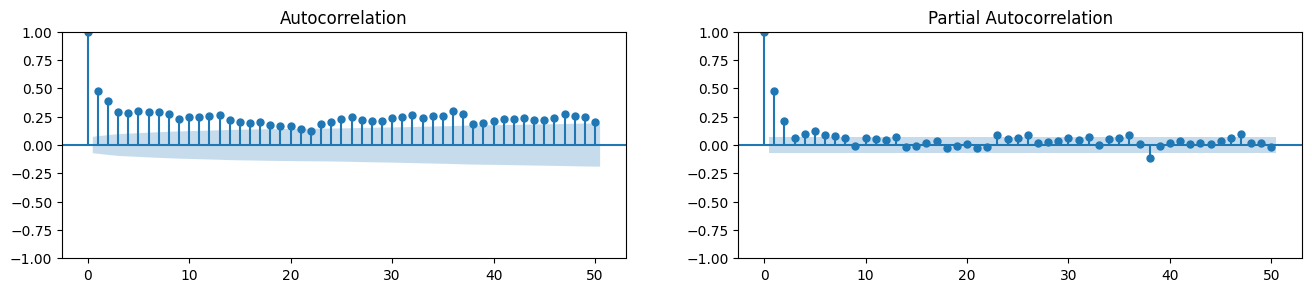

In [30]:
# Calculate ACF and PACF upto 50 lags
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(model_data.temp.tolist(), lags=50, ax=axes[0])
plot_pacf(model_data.temp.tolist(), lags=50, ax=axes[1])

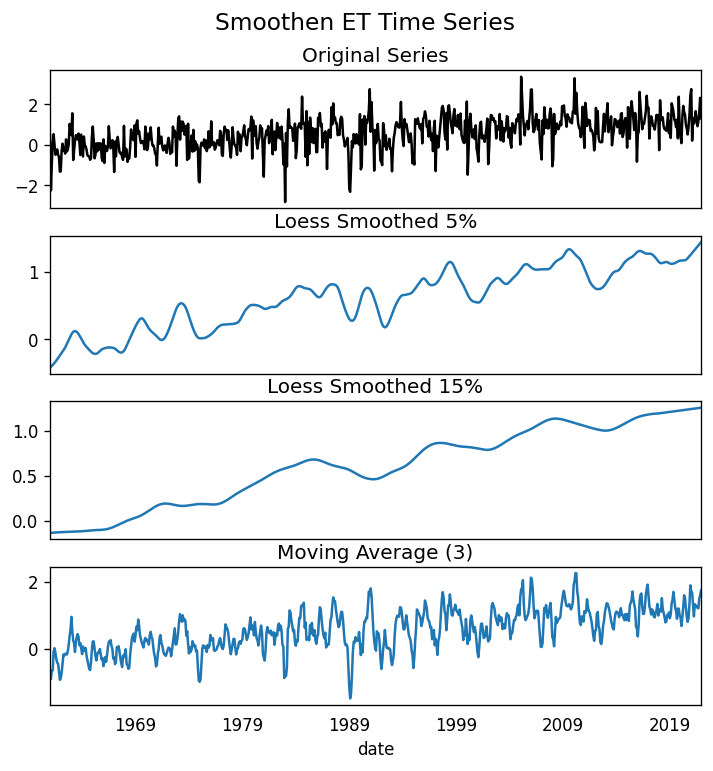

In [31]:
# smoothen a time series
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})


# 1. Moving Average
df_ma = model_data.temp.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(model_data.temp, np.arange(len(model_data.temp)), frac=0.05)[:, 1], index=model_data.index, columns=['temp'])
df_loess_15 = pd.DataFrame(lowess(model_data.temp, np.arange(len(model_data.temp)), frac=0.15)[:, 1], index=model_data.index, columns=['temp'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
model_data['temp'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['temp'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['temp'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('Smoothen ET Time Series', y=0.95, fontsize=14)
plt.show()

## SARIMA model

In [32]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(model_data.temp, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2025.848, Time=0.30 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1788.565, Time=3.74 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2024.572, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1972.690, Time=0.45 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1663.639, Time=3.41 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.57 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1717.733, Time=3.32 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1649.148, Time=4.74 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1774.164, Time=1.41 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.82 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.99 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1651.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  732
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -755.043
Date:                            Sat, 15 Apr 2023   AIC                           1522.087
Time:                                    10:11:44   BIC                           1549.562
Sample:                                         0   HQIC                          1532.694
                                            - 732                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7648      0.059     13.061      0.000       0.650       0.880
ma.L1         -0.5286      0.072     -7.295      0.000      -0.671      -0.387
ar.S.L12      -0.1022      0.039     -2.651      0.008      -0.178      -0.027
ar.S.L24      -0.1188      0.032     -3.683      0.000      -0.182      -0.056
ma.S.L12      -0.8505      0.024    -35.250      0.000      -0.898      -0.803
sigma2         0.4639      0.019     24.978      0.000       0.428       0.500
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                96.28
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

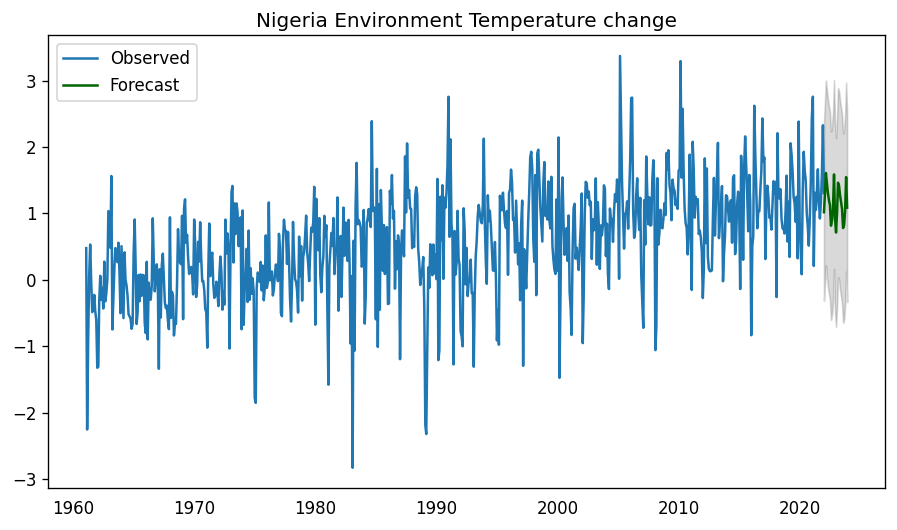

In [33]:
# Forecast for 24 months
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(model_data.index[-1], periods = n_periods, freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(model_data.temp, label='Observed')
plt.plot(fitted_series, color='darkgreen', label='Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend()

plt.title("Nigeria Environment Temperature change")
plt.show()

## Model Evaluation
- Time series pattern: Seasonality is stationary i.e. the patterns are of fixed calendar based frequencies.
- The boxplots make the yearly and monthly distributions evident. 
- Also, in a month-wise boxplot, the months of February, December and January clearly has higher change in temperature, which can be attributed to the harmattan season.
- The Augmented Dickey Fuller test (ADH Test) Unit Root tests was used.
    - If p-value is small → reject null hypothesis i.e. Reject non-stationary.
    - The null hypothesis of the ADF test is that the time series is stationary. 
    - So, if the p-value of the test is less than the significance level (0.05)
    - Null hypotheis is failed to be rejected by the ADF test and infer that the time series is indeed stationary.
    - Therefore, our time series are is stationary, having strong seasonal effects and we will fit SARIMAX model.
- The SARIMAX model was used for forecasting because the dataset has defined seasonality.
- The best model SARIMAX(1, 0, 1)x(2, 1, 1, 12) has an AIC of 1522.087.



Notes:

SARIMAX hyperparameters include the trend and seasonal elements of the time series. The SARIMAX model is specified as: SARIMA(p,d,q)x(P,D,Q)m

- Trend Elements: 

p - Trend autoregression order

d - Trend difference order

q - Trend moving average order


- Seasonal Elements: 

P - Seasonal autoregressive order

D - Seasonal difference order

Q - Seasonal moving average order 

m - The number of time steps for a single seasonal period.

<center> <H2> Thanks for checking the project. <br> Feedbacks are highly welcomed. </H2></center>